
<div align="center"> 
    Санкт-Петербургский государственный университет
</div>
<div align="center"> 
    Saint-Petersburg State University
</div>

<br/><br/>  <br/><br/>

<div align="center">  
    Кафедра физической механики
</div>

<center><b>Отчет</b></center>
<center><b>По лабораторной работе №1 вариант г <br/> МНОГОКРАТНЫЕ ПРЯМЫЕ ИЗМЕРЕНИЯ ФИЗИЧЕСКИХ
ВЕЛИЧИН И ОБРАБОТКА РЕЗУЛЬТАТОВ НАБЛЮДЕНИЙ </b></center>
<br/><br/>  <br/><br/>
<center>Дисциплина <br/> Методы измерений и электромеханические системы <center>
    

<div align="right">  
    Выполнил: <br/> студент группы 251 <br/> Осянин Д.А.
</div>
    
  <center>Санкт-Петербург <br/> 2024 <center>

    





<center><b> Измерение электронным частотомером Ч3-32 частоты
    следования импульсов </b></center>
    
## Введение 

### Задачи лабораторной работы
<br/>

1.Освоить методику использования измерительного прибора для
многократного прямого измерения физической величины.<br/>
2.Выполнить простейшую статистическую обработку серии
результатов наблюдений при прямых измерениях.
<br/>
## Основная часть

###  Установка

<img src="setup_4.jpg" alt="drawing" width="600"/>
<center> В данной установки от генератора сигналов на частотомер подается последовательность
прямоугольных импульсов.
Частота следования импульсов измеряется с помощью частотомера на двух
шкалах: грубой и точной. В качестве генератора импульсов используется
генератор Г5-15, а в качестве частотомера – Ч3—32. 
    </center>
    



### Измерения 

#### 1. Грубые измерения
Сначала было произведено десять наблюдений частоты следования импульсов по грубой шкале прибора <br/>
Вычисление погрешности прибора $\Delta f_{приб}:$ $\Delta f_{приб} = \gamma_{отн}$ $\cdot$ $\overline f$ <br/>
где $\gamma_{отн}$ - относительная погрешность измерений, а $\overline f = \sum\limits_{i=1}^n(f_i) $ - среднеарифметическое измерений  <br/> 
$\gamma_o = \pm \: 5\cdot10^-7$ - основная относительная погрешность частоты внутреннего генератора кварцевого или внешнего источника опорной частоты, $T$ = $T_1 = 10^{-2}$ - время измерения в c. для грубой шкалы, $T$ = $T_2 = 1$ - время измерения в c. для точной шкалы  <br/>
$\gamma_{отн} = \pm(\gamma_o + \frac{1} {f_x \cdot T}) \cdot 100 $


Далее воспользуемся библиотекой pandas для работы с csv таблицей, в которой записаны результаты 10 наблюдений, и кодом на python для расчета необходимых величин по формулам выше. <br/>
Результат запишем в csv таблицу применив метод to_csv к переменной DataFrame с посчитанными данными 

In [275]:
import pandas as pd

#считываем значения и записываем в list для дальнейшей обработки
rough_measurement_data = pd.read_csv('rm.csv', encoding='utf-8' )
rough_measurement_list = rough_measurement_data[rough_measurement_data.columns[0]].to_list()

#фиксированные значения для расчетов
gamma_o = 5*(10**(-7))
t_1 = 10**(-2)
average_f = (sum(rough_measurement_list))/10


gamma_rel_list = [(gamma_o + 1/(f_x*1000 * t_1))*100 for f_x in rough_measurement_list]
delta_f_list = [gamma_rel * average_f/100 for gamma_rel in gamma_rel_list]

n1 = 'Номер п.п.'
n2 = 'Диапазон показаний использованной шкалы прибора (кГц)'
n3 = 'Результаты отдельных наблюдений $f_i$ (кГц)'
n4 = "Погрешность прибора на этой шкале ∆{0} (кГц)".format('$f_{приб}$')

#запись результатов
rough_measurement_table = pd.DataFrame({n1: range(1, 11), n2: ['$0-10^6$']*10, n3: rough_measurement_list, n4: delta_f_list})
rough_measurement_table.to_csv("table_1.scv", index=False)


table_1 = pd.read_csv("table_1.scv", index_col=0)
table_1




,Диапазон показаний использованной шкалы прибора (кГц),Результаты отдельных наблюдений $f_i$ (кГц),Погрешность прибора на этой шкале ∆$f_{приб}$ (кГц)
Номер п.п.,,,
1,$0-10^6$,2.7,0.094816
2,$0-10^6$,2.6,0.098463
3,$0-10^6$,2.5,0.102401
4,$0-10^6$,2.5,0.102401
5,$0-10^6$,2.5,0.102401
6,$0-10^6$,2.6,0.098463
7,$0-10^6$,2.6,0.098463
8,$0-10^6$,2.6,0.098463
9,$0-10^6$,2.5,0.102401


#### 2. Точные измерения 


Далее было проведено 50 измерений показания прибора по точной шкале и проведены аналогичные расчеты - код для них далее. В этом случае диапозон показаний прибора: $0-10^4$, а время измерения в с. $T = T_2 = 1$ <br/>


In [ ]:
accurate_measurements_data = pd.read_csv('aссurate_measurements.csv', encoding='utf-8')
accurate_measurements_list = accurate_measurements_data[accurate_measurements_data.columns[0]].to_list()

average_f_accurate = sum(accurate_measurements_list)/50
t_2 = 1

delta_f = (gamma_o*average_f_accurate + 1/ t_2)/1000
delta_f




Таким образом для данного случая $\Delta f_{приб} = 0.00100000127672 \:кГц $

### Обработка результатов измерений

Воспользуемся кодом на python для подсчета $d_i = (f_i - \overline f)$ и $d_i^2 = (f_i - \overline f)^2$ и библиотекой pandas для занесения полученных результатов в csv файл

In [276]:
random_deviations = [f_i - average_f_accurate for f_i in accurate_measurements_list]
random_deviations_square = [d**2 for d in random_deviations]


n2 = 'Результаты отдельных наблюдений $f_i \:(кГц)$'
n3 = 'Случайные отклонения от среднего $d_i = (f_i - \overline f)\: (кГц)$'
n4 = 'квадраты случайных отклонений $d_i^2 = (f_i -\overline f)^2\:(кГц^2)$'

accurate_measurements_table = pd.DataFrame({n1: range(1, 51), n2: accurate_measurements_list, n3: random_deviations, n4: random_deviations_square  })
accurate_measurements_table.to_csv("table_2.csv", index=False) 

table2 = pd.read_csv('table_2.csv',index_col=0 )
table2


,Результаты отдельных наблюдений $f_i \:(кГц)$,Случайные отклонения от среднего $d_i = (f_i - \overline f)\: (кГц)$,квадраты случайных отклонений $d_i^2 = (f_i -\overline f)^2\:(кГц^2)$
Номер п.п.,,,
1,2.545,-0.00844,0.000071
2,2.531,-0.02244,0.000504
3,2.575,0.02156,0.000465
4,2.549,-0.00444,0.000020
5,2.556,0.00256,0.000007
6,2.562,0.00856,0.000073
7,2.558,0.00456,0.000021
8,2.552,-0.00144,0.000002
9,2.543,-0.01044,0.000109


Для графического представления резултатов наблюдений и их обработки будем использовать библиотеку matplotlib 

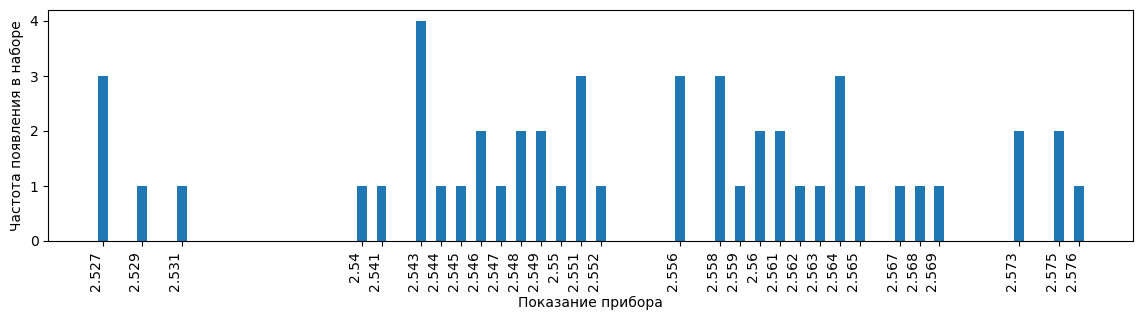

In [267]:

# Подсчет количества повторений каждого значения
unique_values, counts = np.unique(accurate_measurements_list, return_counts=True)

# Создание новой фигуры и осей
fig, ax = plt.subplots(figsize=(14, 3))

# Создание отдельного столбца для каждого значения
ax.bar(unique_values, counts, width=0.0005, tick_label=unique_values)  # Установка ширины столбца

# Настройка осей и заголовка
ax.set_xlabel('Показание прибора')
ax.set_ylabel('Частота появления в наборе')


plt.xticks(rotation=90, ha='right')
plt.yticks(np.arange(0,5,1))

# Показать диаграмму
plt.show()

Для данного набора измерений $f_{min} = 2.527$, $f_{max} = 2.576$, $\overline f = 2.5534399999999993$

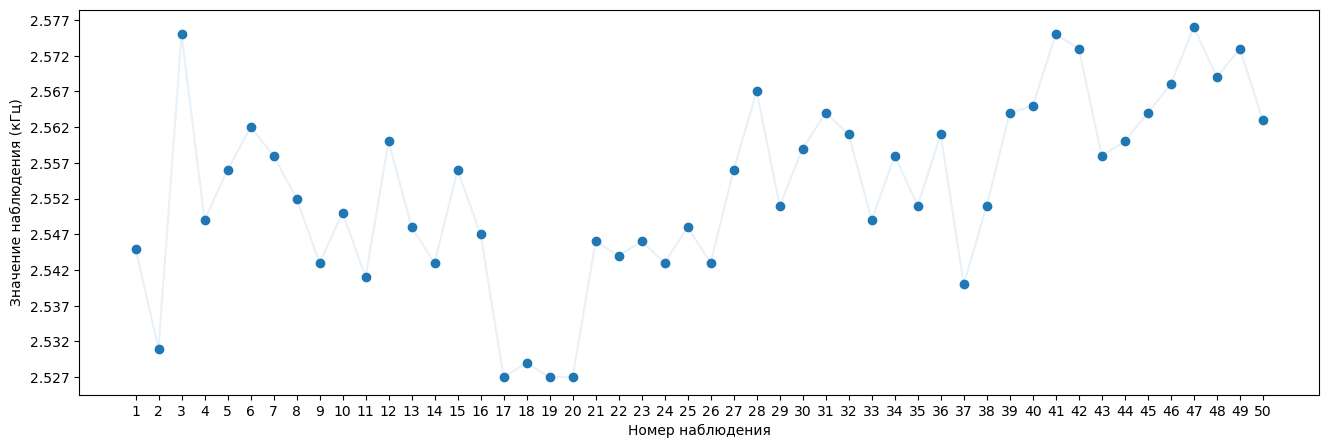

In [268]:
fg, ax = plt.subplots(figsize=(16,5))

xdata = range(1, 51)
ydata = accurate_measurements_list

#добавляем точки на плоскость, соединяем их между собой
plt.scatter(xdata, ydata) 
plt.plot(xdata, ydata, alpha=0.1)

#задаем метки для оси x и y
plt.yticks(np.arange(min(ydata), max(ydata) + 0.005, 0.005))
plt.xticks(range(1,51))

plt.xlabel('Номер наблюдения')
plt.ylabel('Значение наблюдения (кГц)')
plt.show()

In [269]:
n1 = 'Номер интервала'
n2 = 'Границы интервала'
n3 = 'Число случаев ($\Delta n$), когда значение попадает в данный интервал'
n4 = 'Доля (часть) полного числа результатов, попадающих в данный интервал $\delta n = \Delta /n$'

#создаем массив границ интервалов, а затем массив из пар левой и правой границы каждого интервала
ar = [(2.527 + k*0.004) for k in range(14)]
intervals = [[ar[i],ar[i+1]] for i in range(len(ar)-1)]

#высчитываем количество показаний прибора, попавшего в диапазон для каждого диапазона
delta_n = [0]*13
k = 0
for i in range(len(intervals)):
    while intervals[i][0] <= unique_values[k] < intervals[i][1]: 
        delta_n[i]+=counts[k]
        k+=1
        if k >= len(unique_values): break

sigma_n = [d/50 for d in delta_n]

table3 = pd.DataFrame({n1: range(1, 14), n2: intervals, n3: delta_n, n4:sigma_n})
table3.to_csv('table_3.csv', index=False)


data3 = pd.read_csv('table_3.csv', index_col=0)
data3


,Границы интервала,"Число случаев ($\Delta n$), когда значение попадает в данный интервал","Доля (часть) полного числа результатов, попадающих в данный интервал $\delta n = \Delta /n$"
Номер интервала,,,
1,"[2.527, 2.531]",4,0.08
2,"[2.531, 2.535]",1,0.02
3,"[2.535, 2.539]",0,0.00
4,"[2.539, 2.543]",2,0.04
5,"[2.543, 2.547]",8,0.16
6,"[2.547, 2.551]",6,0.12
7,"[2.551, 2.555]",4,0.08
8,"[2.555, 2.559]",6,0.12
9,"[2.559, 2.563]",6,0.12


Воспользуемся методом hist для построения гистрограммы распредления с 15 промежутками на оси Х из переменной intervals

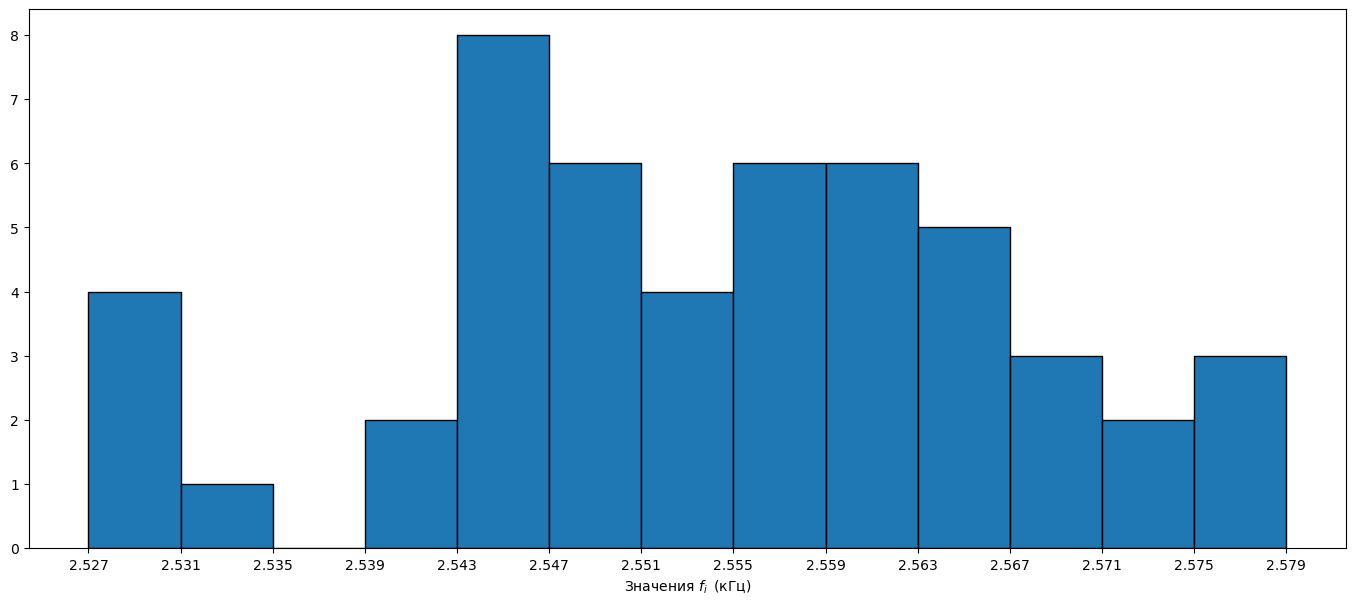

In [270]:
plt.figure(figsize=(17, 7))

plt.hist(accurate_measurements_list, bins=ar,edgecolor='black')
plt.xticks(ar)
plt.xlabel('Значения $f_i \:$ (кГц)')

plt.show()

In [271]:
Для построения приближенного графика будем использовать interp1d из библиотеки SciPy с кубической интерполяцией

SyntaxError: invalid syntax (923756241.py, line 1)

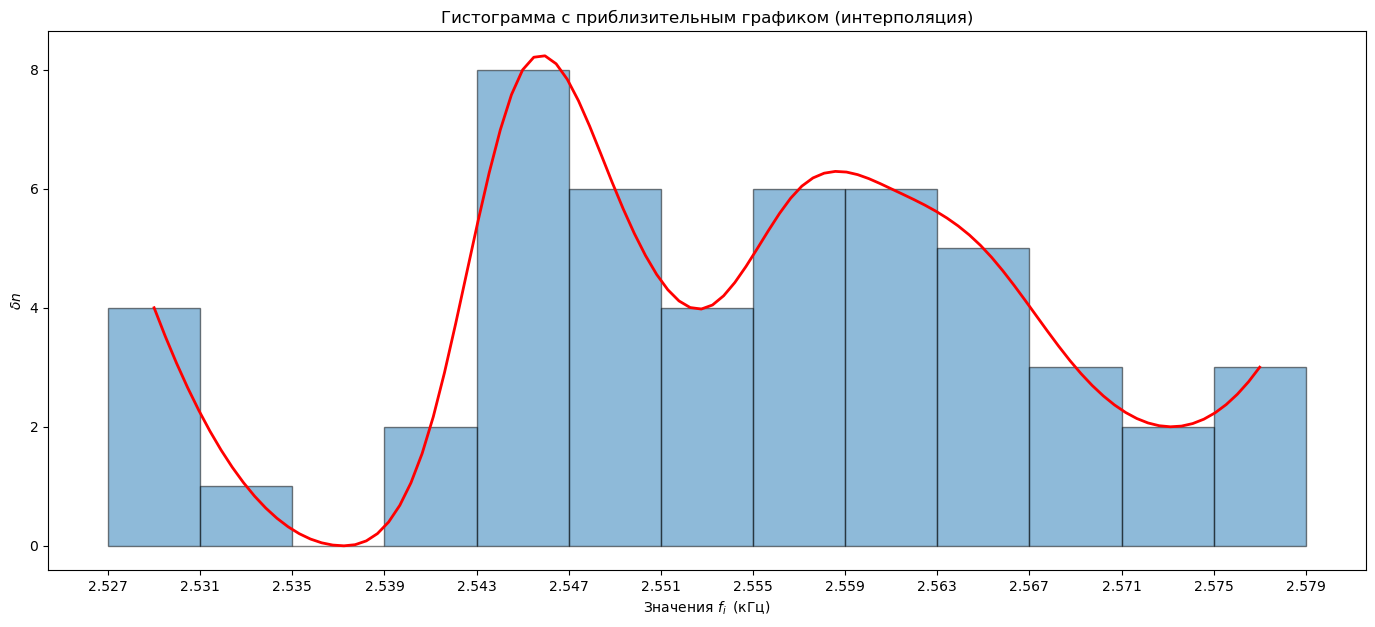

In [272]:
from scipy.interpolate import interp1d

plt.figure(figsize = (17,7))
#строим гистрограмму аналогично предыдущему шагу
#строить график будем 
hist, bins = np.histogram(accurate_measurements_list, bins=ar, density=True)
bin_centers = 0.5 * (bins[:-1] + bins[1:])

#для интерполяции используем массив bin_centers с значениями в центре каждого из интревалов и delta_n из предыдущего шага
#в котором под каждым номером число наблюдений попавших в соотвествующий интервал 
interpolation = interp1d(bin_centers, delta_n, kind='cubic')

x_values = np.linspace(min(bin_centers), max(bin_centers), 100)
y_values = interpolation(x_values)

# Визуализация данных и интерполяции
plt.hist(accurate_measurements_list, bins=ar, alpha=0.5, edgecolor='black')
plt.plot(x_values, y_values, color='red', linestyle='-', linewidth=2)

plt.xticks(ar)
plt.title('Гистограмма с приблизительным графиком (интерполяция)')
plt.xlabel('Значения $f_i \:$ (кГц)')
plt.ylabel('$\delta n$')
plt.show()

In [273]:
from math import sqrt
dispersion = (sum(random_deviations_square)/49)
print('дисперсия:', dispersion)
print('среднеквадратичное отклонение:', sqrt(dispersion))
print('Средняя квадратичная погрешность среднего:', sqrt(dispersion/50))
print('Суммарная погрешность:', sqrt( (dispersion/50) + (delta_f/3)**2))

дисперсия: 0.00016735346938775487
среднеквадратичное отклонение: 0.01293651689550765
Средняя квадратичная погрешность среднего: 0.0018294997643495605
Суммарная погрешность: 0.0018596184508070318


Пользуемся следующими формулами: <br/>
$\sigma \approx \sqrt {\frac{1} {n-1} \sum \limits_{i = 1}^n (f_i - \overline f)} $ <br/>
$\sigma_{\overline x} = \frac{\sigma}{\sqrt{n}}$ <br/>
Таким образом: <br/>
Дисперсия $\sigma^2 =0.00016735346938775487 \: кГц$ <br/>
Среднеквадратичное отклонение $\sigma = 0.01293651689550765 \: кГц$ <br/>
Средняя квадратичная погрешность среднего $ \sigma_{\overline x} = 0.0018294997643495605 \: кГц$ <br/>

Для оценки суммарной погрешности воспользуемся формулой $\Delta x = \sqrt {(\frac {\omega}{3})^2 + (\sigma_{\overline x})^2}$ <br/>
$\Delta x = 0.0018596184508070318 \: кГц $

Окончательный результат: $f = \overline f \pm \Delta x   = 2.5534399999999993 \pm 0.0018596184508070318$

### Выводы

В результате данной работы ознакомился с методиками использования измерительного прибора для многократного прямого измерения физической величины на примере работы с электронным частотомером Ч3-32, была выполнена простая статистическая обработка серии результатов наблюдений при прямых измерениях и вычисление дисперсии и среднеквадратичным отклонением.
